In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5, AZUL6 = '#174A7E', '#4A81BF', "#6495ED", '#2596BE', '#94AFC5', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5, BRANCO = '#231F20', '#414040', '#555655', '#A6A6A5', '#BFBEBE', '#FFFFFF'
VERMELHO1, VERMELHO2, LARANJA1 = '#C3514E',	'#E6BAB7',	'#F79747'
VERDE1, VERDE2, VERDE3 = '#0C8040',	'#9ABB59', '#9ECCB3'

In [20]:
# Importando a base de dados com o PIB dos estados brasileiros de 2002 a 2020
df_pib = pd.read_csv("https://raw.githubusercontent.com/afonsosr2/dataviz-graficos-composicao-relacionamento/master/dados/pib_br_2002_2020_estados.csv")
df_pib

,ano,sigla_uf,regiao,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
0,2002,RO,Norte,7467629886,839731192,6627898698,715526872,1191090432,2484579193,2236702207
1,2003,RO,Norte,9425010486,1108434936,8316575548,1278658831,1216605061,3376727040,2444584625
2,2004,RO,Norte,11004641436,1288806654,9715834778,1288515348,1674933817,3986529419,2765856199
3,2005,RO,Norte,12511821181,1476144194,11035676990,1342222120,1887932121,4603783904,3201738843
4,2006,RO,Norte,13054713344,1613809974,11440903374,1238006193,2210692147,4320526746,3671678293
...,...,...,...,...,...,...,...,...,...,...
508,2016,DF,Centro-Oeste,235540044811,29145619376,206394425435,820754661,9662357225,103859865830,92051447720
509,2017,DF,Centro-Oeste,244722249337,29120461647,215601787690,828313642,8448768236,108322119432,98002586380
510,2018,DF,Centro-Oeste,254817204692,28692287369,226124917323,1022690641,9541298290,113768086938,101792841454
511,2019,DF,Centro-Oeste,273613711477,30686607647,242927103829,992393584,9453608031,125261853488,107219248727


In [21]:
# Verificando os tipos de dados e se existem dados nulos
df_pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ano                513 non-null    int64 
 1   sigla_uf           513 non-null    object
 2   regiao             513 non-null    object
 3   pib                513 non-null    int64 
 4   impostos_liquidos  513 non-null    int64 
 5   va                 513 non-null    int64 
 6   va_agropecuaria    513 non-null    int64 
 7   va_industria       513 non-null    int64 
 8   va_servicos        513 non-null    int64 
 9   va_adespss         513 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 40.2+ KB


In [22]:
# Criando um df com os dados desejados
df_pib_2020 = df_pib.copy()
df_pib_2020 = df_pib_2020.query("ano == 2020").set_index("sigla_uf").sort_values("pib", ascending=False)[["pib"]]

df_pib_2020.head()

,pib
sigla_uf,
SP,2377638979835
RJ,753823710636
MG,682786116407
PR,487930593779
RS,470941846057


In [23]:
# Criando um df com os dados desejados
df_pib_2002 = df_pib.query("ano == 2002")[["regiao","pib"]]
df_pib_2020 = df_pib.query("ano == 2020")[["regiao","pib"]]

df_pib_2002 = df_pib_2002.groupby("regiao").sum().sort_values("pib", ascending=False)
df_pib_2020 = df_pib_2020.groupby("regiao").sum().sort_values("pib", ascending=False)

display(df_pib_2002, df_pib_2020)

,pib
regiao,
Sudeste,854309793369
Sul,241564819092
Nordeste,194847656440
Centro-Oeste,128162640832
Norte,69902366306


,pib
regiao,
Sudeste,3952694729239
Sul,1308147455374
Nordeste,1079331030689
Centro-Oeste,791250735824
Norte,478173048893


In [24]:
# Criando um df com os dados desejados
df_mg_2020 = df_pib.query("ano == 2020")[["sigla_uf", "pib"]]

# Renomeando todos os estados como 'Outros' e mudando da sigla MG para Minas Gerais
df_mg_2020.loc[df_mg_2020["sigla_uf"] == "MG", "sigla_uf"] = "Minas Gerais"
df_mg_2020.loc[df_mg_2020["sigla_uf"] != "Minas Gerais", "sigla_uf"] = "Outros"

df_mg_2020 = df_mg_2020.groupby("sigla_uf").sum()

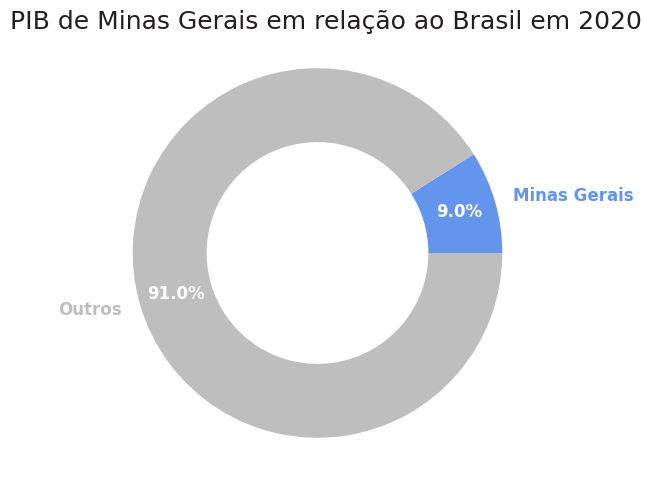

In [30]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Importando as bibliotecas
import matplotlib.pyplot as plt

# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(6,6))

# Definindo as cores do gráfico
cores = [AZUL3, CINZA5]

# Personalizando o gráfico
plt.suptitle('PIB de Minas Gerais em relação ao Brasil em 2020', fontsize=18, color=CINZA1, ha = 'left', x = 0, y = 0.9)

# Gerando o gráfico do PIB de 2020 de Minas Gerais em relação a todo Brasil
ptc, text, _ = ax.pie(data = df_mg_2020, x="pib", labels=df_mg_2020.index, autopct = "%.1f%%",
                      startangle = 0, pctdistance = 0.8, wedgeprops=dict(width=0.4),
                      textprops=dict(size=12, fontweight="bold", color= BRANCO),
                      colors = cores)

# Ajustando as cores das regiões relativas as fatias
for i, p in enumerate(ptc):
  text[i].set_color(p.get_facecolor())

fig.savefig('relacao_mg_br_pib.png', transparent=(False), dpi=300, bbox_inches='tight')

plt.show()

In [27]:
# Selecionando os dados desejados
df_va_separado = df_pib.query("ano == 2020")[["regiao", "va_servicos", "va_industria", "va_adespss", "va_agropecuaria"]]
df_va_separado = df_va_separado.reset_index(drop=True)
df_va_separado.head()

,regiao,va_servicos,va_industria,va_adespss,va_agropecuaria
0,Norte,19060688172,8285675423,12000339417,6891411669
1,Norte,6590543336,1191345379,6031050521,983531817
2,Norte,34795836262,35839810630,20210620577,5114449144
3,Norte,5278754961,1706511471,6538065265,1000907462
4,Norte,56395092425,84173852308,37614037902,19730656823


In [28]:
# Agrupando os dados por região
df_va_separado = df_va_separado.groupby("regiao").agg("sum")

# Normalizando os dados de cada região
df_va_separado = df_va_separado.div(df_va_separado.sum(axis=1), axis=0)
df_va_separado = df_va_separado.sort_values(by="va_servicos", axis=0)
df_va_separado

,va_servicos,va_industria,va_adespss,va_agropecuaria
regiao,,,,
Norte,0.338521,0.323217,0.239485,0.098777
Centro-Oeste,0.435471,0.153645,0.266185,0.144699
Nordeste,0.459790,0.191011,0.260121,0.089078
Sul,0.508060,0.252751,0.139648,0.099541
Sudeste,0.610871,0.228032,0.133536,0.027561


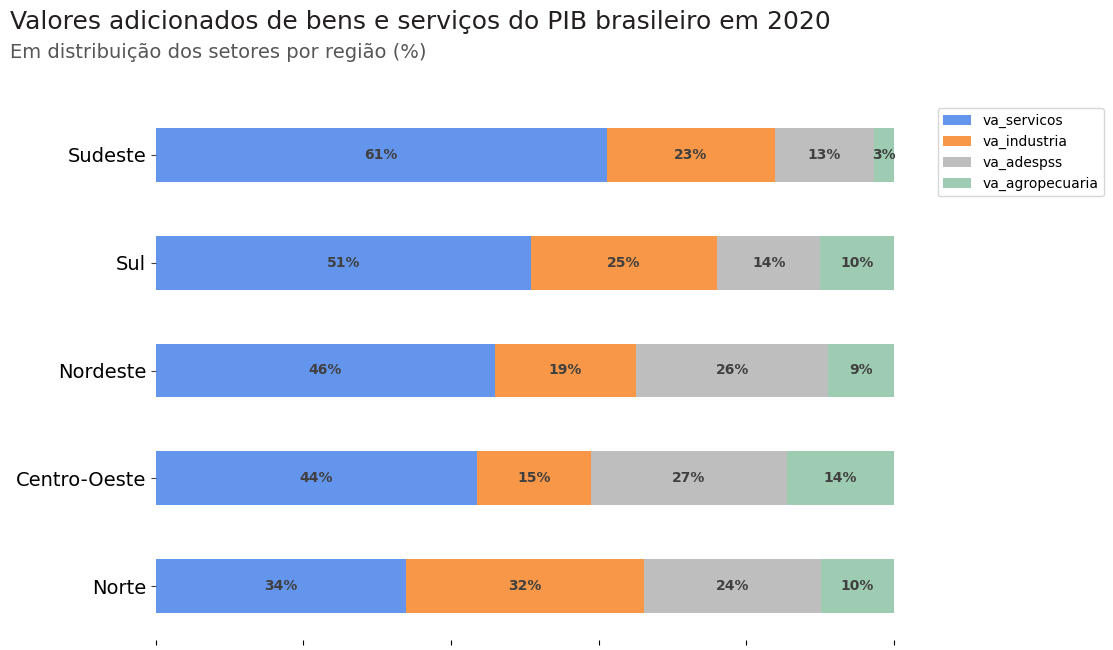

In [31]:
# Gerando a função para criar o gráfico de barras empilhadas

def grafico_va():
  # Importando as bibliotecas
  import matplotlib.pyplot as plt

  # Área do gráfico e tema da visualização
  fig, ax = plt.subplots(figsize=(10,7))

  # Definindo as cores do gráfico
  cores = [AZUL3, LARANJA1, CINZA5, VERDE3]

  # Gerando o gráfico de barras empilhadas 100%
  df_va_separado.plot(kind="barh", stacked=True, color = cores, ax=ax)

  ## Personalizando o gráfico
  plt.suptitle('Valores adicionados de bens e serviços do PIB brasileiro em 2020', size=18, color=CINZA1, ha = 'right', x = 0.8, y = 1.01)
  plt.title('Em distribuição dos setores por região (%)\n', fontsize=14, color=CINZA3, pad = 15, ha = "right", x = 0.35)
  ax.legend(bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes, fontsize = 10, loc='upper left', )
  ax.set_ylabel('')
  ax.set_xticklabels([])
  ax.yaxis.set_tick_params(labelsize=14, color = CINZA2)
  ax.set_frame_on(False)

  # Valores das barras
  for container in ax.containers:
      labels = [f'{valor.get_width()*100:.0f}%' for valor in container]
      ax.bar_label(container, label_type='center', labels = labels, size = 10, color = CINZA2, fontweight='bold')

  return ax, cores

fig.savefig('pib_regioes_2020.png', transparent=(False), dpi=300, bbox_inches='tight')

ax, cores = grafico_va()